In [1]:
#import dependencies
import os
import csv
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
from scipy.stats import linregress


In [2]:
happy2015_df = pd.read_csv('2015.csv')
happy2016_df = pd.read_csv('2016.csv')
happy2017_df = pd.read_csv('2017.csv')
happy2018_df = pd.read_csv('2018.csv')
happy2019_df = pd.read_csv('2019.csv')
#the survey changed over the years, so we need to clean the data up.
norm2015_df = happy2015_df.drop(['Region', 'Standard Error', 'Dystopia Residual'], axis=1)
norm2015_df = norm2015_df[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
norm2015_df.columns = ["Country or Region", "Happiness Rank", "Happiness Score", "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Trust", "Generosity"]

norm2016_df = happy2016_df.drop(['Region','Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], axis=1)
norm2016_df = norm2016_df[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
norm2016_df.columns = ["Country or Region", "Happiness Rank", "Happiness Score", "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Trust", "Generosity"]

norm2017_df = happy2017_df.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis=1)
norm2017_df = norm2017_df[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.', 'Generosity']]
norm2017_df.columns = ["Country or Region", "Happiness Rank", "Happiness Score", "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Trust", "Generosity"]

#norm2015_df = norm2015_df[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]

#happy2018_df.head()
norm2018_df = happy2018_df[['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
norm2018_df.columns = ["Country or Region", "Happiness Rank", "Happiness Score", "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Trust", "Generosity"]
#norm2018_df
norm2019_df = happy2019_df[['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
norm2019_df.columns = ["Country or Region", "Happiness Rank", "Happiness Score", "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Trust", "Generosity"]
norm2019_df

,Country or Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom,Trust,Generosity
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322
...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.411,0.217
152,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.147,0.276
153,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158
154,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235


In [3]:
happy2015_df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [4]:
happy2015_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
# setting up the 5 df (one for each year)for an easy merge of years just with the varaibles TRUST
#2015 Trust
country_rank_trust_2015 = norm2015_df[["Country or Region", "Happiness Rank", "Happiness Score","Trust"]]
country_rank_trust_2015 = country_rank_trust_2015.set_index("Country or Region")
#2016 Trust
country_rank_trust_2016 = norm2016_df[["Country or Region", "Happiness Rank", "Happiness Score","Trust"]]
country_rank_trust_2016 = country_rank_trust_2016.set_index("Country or Region")
#2017 Trust
country_rank_trust_2017 = norm2017_df[["Country or Region", "Happiness Rank", "Happiness Score","Trust"]]
country_rank_trust_2017 = country_rank_trust_2017.set_index("Country or Region")
#2018 Trust
country_rank_trust_2018 = norm2018_df[["Country or Region", "Happiness Rank", "Happiness Score","Trust"]]
country_rank_trust_2018 = country_rank_trust_2018.set_index("Country or Region")
#2019 Trust
country_rank_trust_2019 = norm2019_df[["Country or Region", "Happiness Rank", "Happiness Score","Trust"]]
country_rank_trust_2019 = country_rank_trust_2019.set_index("Country or Region")


In [6]:
# setting up the 5 df (one for each year)for an easy merge of years just with the varaibles LIFE EXPECTANCY
#2015 LIFE EXPECTANCY (LE)
country_rank_LE_2015 = norm2015_df[["Country or Region", "Happiness Rank", "Happiness Score","Healthy Life Expectancy"]]
country_rank_LE_2015 = country_rank_LE_2015.set_index("Country or Region")
#2016 LIFE EXPECTANCY (LE)
country_rank_LE_2016 = norm2016_df[["Country or Region", "Happiness Rank", "Happiness Score","Healthy Life Expectancy"]]
country_rank_LE_2016 = country_rank_LE_2016.set_index("Country or Region")
#2017 LIFE EXPECTANCY (LE)
country_rank_LE_2017 = norm2017_df[["Country or Region", "Happiness Rank", "Happiness Score","Healthy Life Expectancy"]]
country_rank_LE_2017 = country_rank_LE_2017.set_index("Country or Region")
#2018 LIFE EXPECTANCY (LE)
country_rank_LE_2018 = norm2018_df[["Country or Region", "Happiness Rank", "Happiness Score","Healthy Life Expectancy"]]
country_rank_LE_2018 = country_rank_LE_2018.set_index("Country or Region")
#2019 LIFE EXPECTANCY (LE)
country_rank_LE_2019 = norm2019_df[["Country or Region", "Happiness Rank", "Happiness Score","Healthy Life Expectancy"]]
country_rank_LE_2019 = country_rank_LE_2019.set_index("Country or Region")


In [7]:
# merging the dataframes for TRUST
trust_2015and2016 = country_rank_trust_2015.merge(country_rank_trust_2016, on="Country or Region")
trust_2015and2016_2017 = trust_2015and2016.merge(country_rank_trust_2017, on="Country or Region")
trust_2015and2016_2017_2018 = trust_2015and2016_2017.merge(country_rank_trust_2018, on="Country or Region")
trust_merged = trust_2015and2016_2017_2018.merge(country_rank_trust_2019, on="Country or Region")
trust_merged.columns = ["Happiness Rank 2015", "Happiness Score 2015", "Trust 2015", "Happiness Rank 2016", "Happiness Score 2016", "Trust 2016","Happiness Rank 2017", "Happiness Score 2017", "Trust 2017","Happiness Rank 2018", "Happiness Score 2018", "Trust 2018","Happiness Rank 2019", "Happiness Score 2019", "Trust 2019"]
trust_merged

,Happiness Rank 2015,Happiness Score 2015,Trust 2015,Happiness Rank 2016,Happiness Score 2016,Trust 2016,Happiness Rank 2017,Happiness Score 2017,Trust 2017,Happiness Rank 2018,Happiness Score 2018,Trust 2018,Happiness Rank 2019,Happiness Score 2019,Trust 2019
Country or Region,,,,,,,,,,,,,,,
Switzerland,1,7.587,0.41978,2,7.509,0.41203,4,7.494,0.367007,5,7.487,0.357,6,7.480,0.343
Iceland,2,7.561,0.14145,3,7.501,0.14975,3,7.504,0.153527,4,7.495,0.138,4,7.494,0.118
Denmark,3,7.527,0.48357,1,7.526,0.44453,2,7.522,0.400770,3,7.555,0.408,2,7.600,0.410
Norway,4,7.522,0.36503,4,7.498,0.35776,1,7.537,0.315964,2,7.594,0.340,3,7.554,0.341
Canada,5,7.427,0.32957,6,7.404,0.31329,7,7.316,0.287372,7,7.328,0.291,9,7.278,0.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,154,3.465,0.55191,152,3.515,0.50521,151,3.471,0.455220,151,3.408,0.444,152,3.334,0.411
Benin,155,3.340,0.08010,153,3.484,0.06681,143,3.657,0.060929,136,4.141,0.067,102,4.883,0.082
Syria,156,3.006,0.18906,156,3.069,0.17233,152,3.462,0.151347,150,3.462,0.144,149,3.462,0.141


In [8]:
#create a function to generate scatter plots
def plotting_happiness(x_values, y_values, x_label, y_label, chart_title):
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(chart_title)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, c="green")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,6),fontsize=8,color="green")
    plt.show()
    print(line_eq)

In [9]:
#compare the relationship between GDP/Money on all the other variables
norm2019_df.head()

,Country or Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom,Trust,Generosity
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322


In [10]:
# ANOVA TESTING for 2015 sample 
# happy2015_df
# Western Europe', 'North America', 'Australia and New Zealand',
#        'Middle East and Northern Africa', 'Latin America and Caribbean',
#        'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
#        'Sub-Saharan Africa', 'Southern Asia'

F_onewayResult(statistic=24.758067552540243, pvalue=1.7476809139741656e-25)

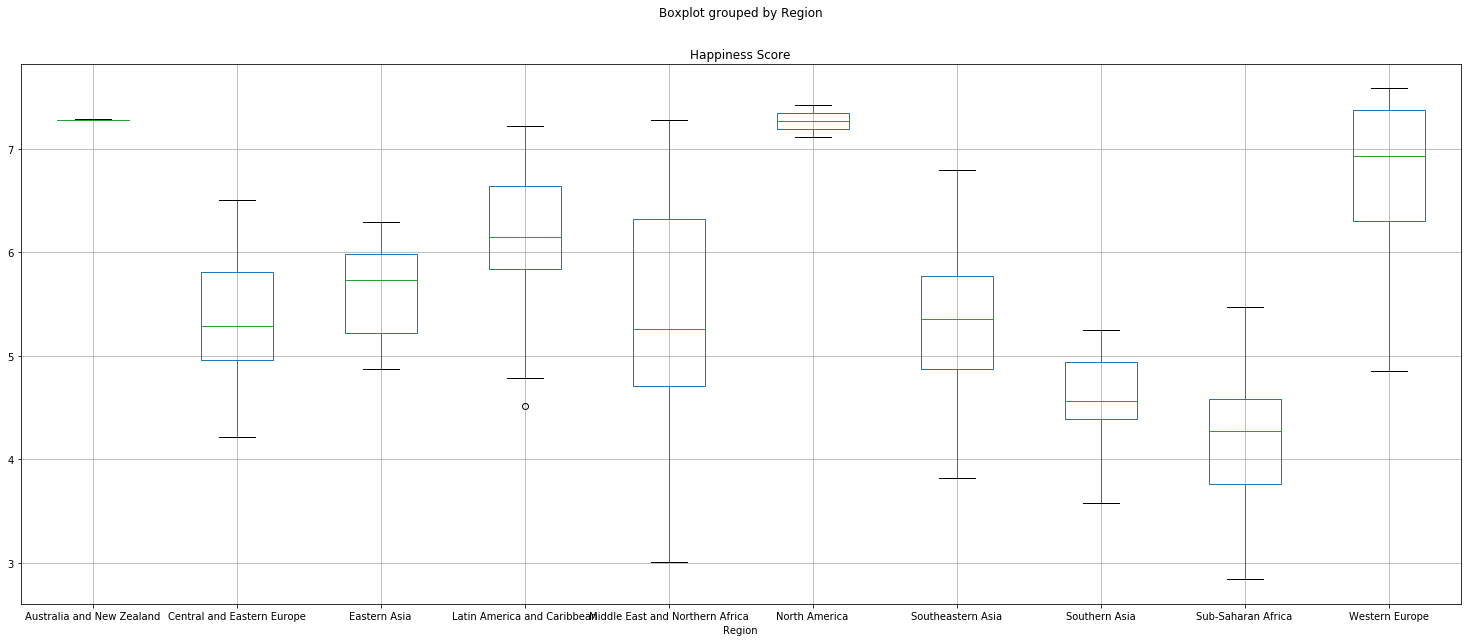

In [11]:
happy2015_df.boxplot("Happiness Score", by="Region", figsize=(25, 10))
group1 = happy2015_df[happy2015_df["Region"] == "Western Europe"]["Happiness Score"]
group2 = happy2015_df[happy2015_df["Region"] == "Eastern Asia"]["Happiness Score"]
group3 = happy2015_df[happy2015_df["Region"] == "Southern Asia"]["Happiness Score"]
group4 = happy2015_df[happy2015_df["Region"] == "Latin America and Caribbean"]["Happiness Score"]
group5 = happy2015_df[happy2015_df["Region"] == "North America"]["Happiness Score"]
group6 = happy2015_df[happy2015_df["Region"] == "Australia and New Zealand"]["Happiness Score"]
group7 = happy2015_df[happy2015_df["Region"] == "Middle East and Northern Africa"]["Happiness Score"]
group8 = happy2015_df[happy2015_df["Region"] == "Southeastern Asia"]["Happiness Score"]
group9 = happy2015_df[happy2015_df["Region"] == "Central and Eastern Europe"]["Happiness Score"]
group10 = happy2015_df[happy2015_df["Region"] == "Sub-Saharan Africa"]["Happiness Score"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

F_onewayResult(statistic=4.3633311983532606, pvalue=4.605787274744302e-05)

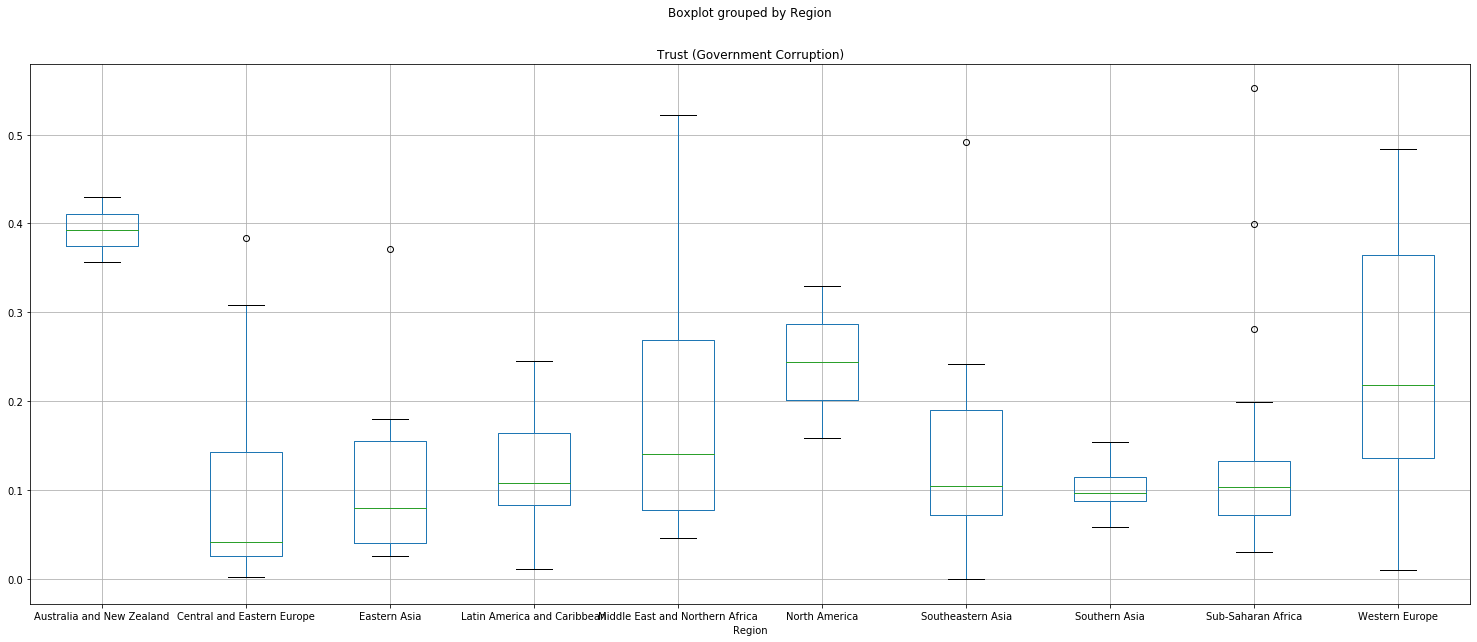

In [12]:
happy2015_df.boxplot("Trust (Government Corruption)", by="Region", figsize=(25, 10))
group1 = happy2015_df[happy2015_df["Region"] == "Western Europe"]["Trust (Government Corruption)"]
group2 = happy2015_df[happy2015_df["Region"] == "Eastern Asia"]["Trust (Government Corruption)"]
group3 = happy2015_df[happy2015_df["Region"] == "Southern Asia"]["Trust (Government Corruption)"]
group4 = happy2015_df[happy2015_df["Region"] == "Latin America and Caribbean"]["Trust (Government Corruption)"]
group5 = happy2015_df[happy2015_df["Region"] == "North America"]["Trust (Government Corruption)"]
group6 = happy2015_df[happy2015_df["Region"] == "Australia and New Zealand"]["Trust (Government Corruption)"]
group7 = happy2015_df[happy2015_df["Region"] == "Middle East and Northern Africa"]["Trust (Government Corruption)"]
group8 = happy2015_df[happy2015_df["Region"] == "Southeastern Asia"]["Trust (Government Corruption)"]
group9 = happy2015_df[happy2015_df["Region"] == "Central and Eastern Europe"]["Trust (Government Corruption)"]
group10 = happy2015_df[happy2015_df["Region"] == "Sub-Saharan Africa"]["Trust (Government Corruption)"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10)

In [13]:
happy2015_df.loc[happy2015_df["Region"] == 'Sub-Saharan Africa']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
70,Mauritius,Sub-Saharan Africa,71,5.477,0.07197,1.00761,0.98521,0.70950,0.56066,0.07521,0.37744,1.76145
77,Nigeria,Sub-Saharan Africa,78,5.268,0.04192,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233,2.89319
84,Zambia,Sub-Saharan Africa,85,5.129,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032
93,Mozambique,Sub-Saharan Africa,94,4.971,0.07896,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137
96,Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832
100,Swaziland,Sub-Saharan Africa,101,4.867,0.08742,0.71206,1.07284,0.07566,0.30658,0.03060,0.18259,2.48676
112,South Africa,Sub-Saharan Africa,113,4.642,0.04585,0.92049,1.18468,0.27688,0.33207,0.08884,0.11973,1.71956
113,Ghana,Sub-Saharan Africa,114,4.633,0.04742,0.54558,0.67954,0.40132,0.42342,0.04355,0.23087,2.30919
114,Zimbabwe,Sub-Saharan Africa,115,4.610,0.04290,0.27100,1.03276,0.33475,0.25861,0.08079,0.18987,2.44191


In [14]:
norm2015_df
norm2016_df
norm2017_df
norm2018_df
norm2019_df

,Country or Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom,Trust,Generosity
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322
...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.411,0.217
152,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.147,0.276
153,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158
154,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235


In [15]:
# Merge the first two datasets on "Country" so that no data is lost 
combined_df_2015_2016 = pd.merge(norm2015_df, norm2016_df, how='outer', on='Country or Region')
combined_df_2015_2016

,Country or Region,Happiness Rank_x,Happiness Score_x,GDP per Capita_x,Social Support_x,Healthy Life Expectancy_x,Freedom_x,Trust_x,Generosity_x,Happiness Rank_y,Happiness Score_y,GDP per Capita_y,Social Support_y,Healthy Life Expectancy_y,Freedom_y,Trust_y,Generosity_y
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,Belize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,5.956,0.87616,0.68655,0.45569,0.51231,0.10771,0.23684
160,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,5.440,0.00000,0.33613,0.11466,0.56778,0.31180,0.27225
161,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,5.057,0.25558,0.75862,0.33108,0.39130,0.36794,0.51479
162,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.0,4.574,0.93287,0.70362,0.34745,0.48614,0.10398,0.07795


In [16]:
# Rename our _x columns to "2015"
combined_df_2015_2016 = combined_df_2015_2016.rename(columns={"Happiness Rank_x":"Happiness Rank 2015", 
                                                              "Happiness Score_x":"Happiness Score 2015", 
                                                              "GDP per Capita_x":"GDP 2015",
                                                              "Social Support_x": "Social Support 2015",
                                                              "Healthy Life Expectancy_x": "Life Expectancy 2015",
                                                              "Freedom_x": "Freedom 2015",
                                                              "Trust_x": "Trust 2015",
                                                              "Generosity_x": "Generosity 2015"
                                                             })

# Rename our _y columns to "2016"
combined_df_2015_2016 = combined_df_2015_2016.rename(columns={"Happiness Rank_y":"Happiness Rank 2016", 
                                                              "Happiness Score_y":"Happiness Score 2016", 
                                                              "GDP per Capita_y":"GDP 2016",
                                                              "Social Support_y": "Social Support 2016",
                                                              "Healthy Life Expectancy_y": "Life Expectancy 2016",
                                                              "Freedom_y": "Freedom 2016",
                                                              "Trust_y": "Trust 2016",
                                                              "Generosity_y": "Generosity 2016"
                                                             })

combined_df_2015_2016.head()

,Country or Region,Happiness Rank 2015,Happiness Score 2015,GDP 2015,Social Support 2015,Life Expectancy 2015,Freedom 2015,Trust 2015,Generosity 2015,Happiness Rank 2016,Happiness Score 2016,GDP 2016,Social Support 2016,Life Expectancy 2016,Freedom 2016,Trust 2016,Generosity 2016
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834


In [17]:
combined_df_2015_2016_2017 = pd.merge(combined_df_2015_2016, norm2017_df, how='outer', on='Country or Region')
combined_df_2015_2016_2017

,Country or Region,Happiness Rank 2015,Happiness Score 2015,GDP 2015,Social Support 2015,Life Expectancy 2015,Freedom 2015,Trust 2015,Generosity 2015,Happiness Rank 2016,...,Trust 2016,Generosity 2016,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom,Trust,Generosity
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.41203,0.28083,4.0,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.14975,0.47678,3.0,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.44453,0.36171,2.0,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.35776,0.37895,1.0,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.31329,0.44834,7.0,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Somaliland Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,...,0.36794,0.51479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,Namibia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.0,...,0.10398,0.07795,111.0,4.574,0.964434,1.098471,0.338612,0.520304,0.093147,0.077134
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.0,...,0.13015,0.25899,147.0,3.591,0.397249,0.601323,0.163486,0.147062,0.116794,0.285671
164,Taiwan Province of China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33.0,6.422,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360


In [18]:
combined_df_2015_2016_2017 = combined_df_2015_2016_2017.rename(columns={"Happiness Rank":"Happiness Rank 2017", 
                                                              "Happiness Score":"Happiness Score 2017", 
                                                              "GDP per Capita":"GDP 2017",
                                                              "Social Support": "Social Support 2017",
                                                              "Healthy Life Expectancy": "Life Expectancy 2017",
                                                              "Freedom": "Freedom 2017",
                                                              "Trust": "Trust 2017",
                                                              "Generosity": "Generosity 2017"
                                                             })

combined_df_2015_2016_2017.head()

,Country or Region,Happiness Rank 2015,Happiness Score 2015,GDP 2015,Social Support 2015,Life Expectancy 2015,Freedom 2015,Trust 2015,Generosity 2015,Happiness Rank 2016,...,Trust 2016,Generosity 2016,Happiness Rank 2017,Happiness Score 2017,GDP 2017,Social Support 2017,Life Expectancy 2017,Freedom 2017,Trust 2017,Generosity 2017
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.41203,0.28083,4.0,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.14975,0.47678,3.0,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.44453,0.36171,2.0,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.35776,0.37895,1.0,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.31329,0.44834,7.0,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540


In [19]:
combined_df_2015_2016_2017_2018 = pd.merge(combined_df_2015_2016_2017, norm2018_df, how='outer', on='Country or Region')
combined_df_2015_2016_2017_2018

,Country or Region,Happiness Rank 2015,Happiness Score 2015,GDP 2015,Social Support 2015,Life Expectancy 2015,Freedom 2015,Trust 2015,Generosity 2015,Happiness Rank 2016,...,Trust 2017,Generosity 2017,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom,Trust,Generosity
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.367007,0.290549,5.0,7.487,1.420,1.549,0.927,0.660,0.357,0.256
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.153527,0.475540,4.0,7.495,1.343,1.644,0.914,0.677,0.138,0.353
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.400770,0.355280,3.0,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.315964,0.362012,2.0,7.594,1.456,1.582,0.861,0.686,0.340,0.286
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.287372,0.435540,7.0,7.328,1.330,1.532,0.896,0.653,0.291,0.321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.0,...,0.116794,0.285671,154.0,3.254,0.337,0.608,0.177,0.112,0.106,0.224
164,Taiwan Province of China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.063829,0.258360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,"Hong Kong S.A.R., China",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.293934,0.374466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Trinidad & Tobago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.0,6.192,1.223,1.492,0.564,0.575,0.019,0.171


In [20]:
combined_df_2015_2016_2017_2018 = combined_df_2015_2016_2017_2018.rename(columns={"Happiness Rank":"Happiness Rank 2018", 
                                                              "Happiness Score":"Happiness Score 2018", 
                                                              "GDP per Capita":"GDP 2018",
                                                              "Social Support": "Social Support 2018",
                                                              "Healthy Life Expectancy": "Life Expectancy 2018",
                                                              "Freedom": "Freedom 2018",
                                                              "Trust": "Trust 2018",
                                                              "Generosity": "Generosity 2018"
                                                             })
combined_df_2015_2016_2017_2018

,Country or Region,Happiness Rank 2015,Happiness Score 2015,GDP 2015,Social Support 2015,Life Expectancy 2015,Freedom 2015,Trust 2015,Generosity 2015,Happiness Rank 2016,...,Trust 2017,Generosity 2017,Happiness Rank 2018,Happiness Score 2018,GDP 2018,Social Support 2018,Life Expectancy 2018,Freedom 2018,Trust 2018,Generosity 2018
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.367007,0.290549,5.0,7.487,1.420,1.549,0.927,0.660,0.357,0.256
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.153527,0.475540,4.0,7.495,1.343,1.644,0.914,0.677,0.138,0.353
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.400770,0.355280,3.0,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.315964,0.362012,2.0,7.594,1.456,1.582,0.861,0.686,0.340,0.286
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.287372,0.435540,7.0,7.328,1.330,1.532,0.896,0.653,0.291,0.321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.0,...,0.116794,0.285671,154.0,3.254,0.337,0.608,0.177,0.112,0.106,0.224
164,Taiwan Province of China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.063829,0.258360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,"Hong Kong S.A.R., China",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.293934,0.374466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,Trinidad & Tobago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38.0,6.192,1.223,1.492,0.564,0.575,0.019,0.171


In [21]:
combined_df_all= pd.merge(combined_df_2015_2016_2017_2018, norm2019_df, how='outer', on='Country or Region')
combined_df_all = combined_df_all.rename(columns={"Happiness Rank":"Happiness Rank 2019", 
                                                              "Happiness Score":"Happiness Score 2019", 
                                                              "GDP per Capita":"GDP 2019",
                                                              "Social Support": "Social Support 2019",
                                                              "Healthy Life Expectancy": "Life Expectancy 2019",
                                                              "Freedom": "Freedom 2019",
                                                              "Trust": "Trust 2019",
                                                              "Generosity": "Generosity 2019"
                                                             })

combined_df_all = combined_df_all.fillna(0)
combined_df_all

,Country or Region,Happiness Rank 2015,Happiness Score 2015,GDP 2015,Social Support 2015,Life Expectancy 2015,Freedom 2015,Trust 2015,Generosity 2015,Happiness Rank 2016,...,Trust 2018,Generosity 2018,Happiness Rank 2019,Happiness Score 2019,GDP 2019,Social Support 2019,Life Expectancy 2019,Freedom 2019,Trust 2019,Generosity 2019
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.357,0.256,6.0,7.480,1.452,1.526,1.052,0.572,0.343,0.263
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.138,0.353,4.0,7.494,1.380,1.624,1.026,0.591,0.118,0.354
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.408,0.284,2.0,7.600,1.383,1.573,0.996,0.592,0.410,0.252
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.340,0.286,3.0,7.554,1.488,1.582,1.028,0.603,0.341,0.271
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.291,0.321,9.0,7.278,1.365,1.505,1.039,0.584,0.308,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,"Hong Kong S.A.R., China",0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000
166,Trinidad & Tobago,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.019,0.171,39.0,6.192,1.231,1.477,0.713,0.489,0.016,0.185
167,Northern Cyprus,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.154,0.179,64.0,5.718,1.263,1.252,1.042,0.417,0.162,0.191
168,North Macedonia,0.0,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,...,0.000,0.000,84.0,5.274,0.983,1.294,0.838,0.345,0.034,0.185


In [22]:
combined_df_all = combined_df_all.set_index("Country or Region")
combined_df_all.head()


,Happiness Rank 2015,Happiness Score 2015,GDP 2015,Social Support 2015,Life Expectancy 2015,Freedom 2015,Trust 2015,Generosity 2015,Happiness Rank 2016,Happiness Score 2016,...,Trust 2018,Generosity 2018,Happiness Rank 2019,Happiness Score 2019,GDP 2019,Social Support 2019,Life Expectancy 2019,Freedom 2019,Trust 2019,Generosity 2019
Country or Region,,,,,,,,,,,,,,,,,,,,,
Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,7.509,...,0.357,0.256,6.0,7.480,1.452,1.526,1.052,0.572,0.343,0.263
Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,7.501,...,0.138,0.353,4.0,7.494,1.380,1.624,1.026,0.591,0.118,0.354
Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,7.526,...,0.408,0.284,2.0,7.600,1.383,1.573,0.996,0.592,0.410,0.252
Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,7.498,...,0.340,0.286,3.0,7.554,1.488,1.582,1.028,0.603,0.341,0.271
Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,7.404,...,0.291,0.321,9.0,7.278,1.365,1.505,1.039,0.584,0.308,0.285


In [41]:
country_name = input("What country would you like to look at?")

What country would you like to look at?United States


In [42]:
country_name

'United States'

In [43]:
# Create a series that looks for factors for all 5 years
happiness_rank_over_time = combined_df_all.loc[country_name,["Happiness Rank 2015","Happiness Rank 2016", "Happiness Rank 2017", "Happiness Rank 2018", "Happiness Rank 2019"]]

# Create a series that looks for factors for all 5 years
happiness_score_over_time = combined_df_all.loc[country_name,["Happiness Score 2015","Happiness Score 2016", "Happiness Score 2017", "Happiness Score 2018", "Happiness Score 2019"]]
# Create a series that looks for factors for all 5 years
gdp_over_time = combined_df_all.loc[country_name,["GDP 2015","GDP 2016", "GDP 2017", "GDP 2018", "GDP 2019"]]
# Create a series that looks for factors for all 5 years
social_over_time = combined_df_all.loc[country_name,["Social Support 2015","Social Support 2016", "Social Support 2017", "Social Support 2018", "Social Support 2019"]]
# Create a series that looks for factors for all 5 years
life_expectancy_over_time = combined_df_all.loc[country_name,["Life Expectancy 2015","Life Expectancy 2016", "Life Expectancy 2017", "Life Expectancy 2018", "Life Expectancy 2019"]]
# Create a series that looks for factors for all 5 years
freedom_over_time = combined_df_all.loc[country_name,["Freedom 2015","Freedom 2016", "Freedom 2017", "Freedom 2018", "Freedom 2019"]]
# Create a series that looks for factors for all 5 years
trust_over_time = combined_df_all.loc[country_name,["Trust 2015","Trust 2016", "Trust 2017", "Trust 2018", "Trust 2019"]]
# Create a series that looks for factors for all 5 years
generosity_over_time = combined_df_all.loc[country_name,["Generosity 2015","Generosity 2016", "Generosity 2017", "Generosity 2018", "Generosity 2019"]]

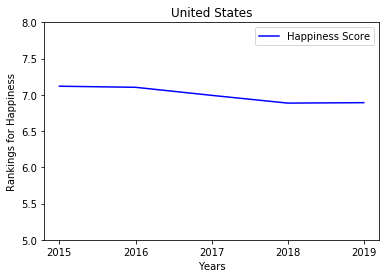

In [44]:
# Create a list of the years that we will use as our x axis
years = ["2015", "2016", "2017", "2018", "2019"]

# Plot our line that will be used to track a wrestler's wins over the years
#plt.plot(years, happiness_rank_over_time, color="orange", label="Happiness Rank")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, happiness_score_over_time, color="blue", label="Happiness Score")
# plt.plot(years, gdp_over_time, color="red", label="GDP")
# plt.plot(years, social_over_time, color="orange", label="Social Support")
# plt.plot(years, life_expectancy_over_time, color="yellow", label="Life Expectancy")
# plt.plot(years, freedom_over_time, color="black", label="Freedom")
# plt.plot(years, trust_over_time, color="purple", label="Trust")
# plt.plot(years, generosity_over_time, color="brown", label="Generosity")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")
plt.ylim(5, 8)
#plt.title(wrestler_name + "'s Recent Career")
plt.xlabel("Years")
plt.ylabel("Rankings for Happiness")
plt.title(country_name)

# Print our chart to the screen
plt.show()

In [40]:
#new_df = combined_df_all.loc[combined_df_all["Happiness Score 2015", "Happiness Score 2016", "Happiness Score 2017", "Happiness Score 2018", "Happiness Score 2019"]]
#new_df